<a href="https://colab.research.google.com/github/sukha002/AIDI/blob/master/1002/AIDI_1002_Week_5_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LR

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
data = pd.read_csv('/content/loan_DT_NB.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(480, 13)
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [ ]:
data=data.drop(['Loan_ID','Education','Property_Area'],axis=1)


In [ ]:
data['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [ ]:
count_no_sub = len(data[data['Loan_Status']=='N'])
count_sub = len(data[data['Loan_Status']=='Y'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no  is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of yesis", pct_of_sub*100)

percentage of no  is 30.833333333333336
percentage of yesis 69.16666666666667


In [ ]:
cat_vars=['Gender', 'Married', 'Dependents', 'Self_Employed']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Gender', 'Married', 'Dependents', 'Self_Employed']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
len(data.columns)

20

In [ ]:
data_final=data[to_keep]
data_final.columns.values

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Self_Employed_No', 'Self_Employed_Yes'], dtype=object)

In [ ]:
X = data_final.loc[:, data_final.columns != 'Loan_Status']
y = data_final.loc[:, data_final.columns == 'Loan_Status']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13 36]
 [ 2 93]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.87      0.27      0.41        49
           Y       0.72      0.98      0.83        95

    accuracy                           0.74       144
   macro avg       0.79      0.62      0.62       144
weighted avg       0.77      0.74      0.69       144



### DT

In [ ]:
!pip install seaborn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
df_dt=pd.read_csv('/content/loan_DT_NB.csv')
df_dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_dt['Gender']=df_dt['Gender'].map({'Male':1,'Female':0})
df_dt['Married']=df_dt['Married'].map({'Yes':1,'No':0})
df_dt['Education']=df_dt['Education'].map({'Graduate':1,'Not Graduate':0})
df_dt['Dependents'].replace('3+',3,inplace=True)
df_dt['Self_Employed']=df_dt['Self_Employed'].map({'Yes':1,'No':0})
df_dt['Property_Area']=df_dt['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
df_dt['Loan_Status']=df_dt['Loan_Status'].map({'Y':1,'N':0})

#Null Value Imputation
rev_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
df_dt[rev_null]=df_dt[rev_null].replace({np.nan:df_dt['Gender'].mode(),
                                   np.nan:df_dt['Married'].mode(),
                                   np.nan:df_dt['Dependents'].mode(),
                                   np.nan:df_dt['Self_Employed'].mode(),
                                   np.nan:df_dt['Credit_History'].mode(),
                                   np.nan:df_dt['LoanAmount'].mean(),
                                   np.nan:df_dt['Loan_Amount_Term'].mean()})

In [ ]:
from sklearn.model_selection import train_test_split
X=df_dt.drop(columns=['Loan_ID','Loan_Status','Education','Property_Area']).values
Y=df_dt['Loan_Status'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_train)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,dt_pred_train))

Training Set Evaluation F1-Score=> 1.0


In [ ]:
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,dt_pred_test))

Testing Set Evaluation F1-Score=> 0.7636363636363637


In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test,dt_pred_test)))

Model accuracy score: 0.6829


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,dt_pred_test))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52        43
           1       0.74      0.79      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.64      0.64       123
weighted avg       0.68      0.68      0.68       123



### NB

In [ ]:
!pip install seaborn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = 'loan_DT_NB.csv'
#df = pd.read_csv(data, header=None, sep=',\s')
df=pd.read_csv(data)
df = df.dropna()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 8 categorical variables

The categorical variables are :

 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [ ]:
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Loan_ID  contains  480  labels
Gender  contains  2  labels
Married  contains  2  labels
Dependents  contains  4  labels
Education  contains  2  labels
Self_Employed  contains  2  labels
Property_Area  contains  3  labels
Loan_Status  contains  2  labels


In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [ ]:
X = df.drop(['Loan_ID','Loan_Status','Education','Property_Area'], axis=1)
y = df['Loan_Status']

In [ ]:
categorical = [var for var in X.columns if X[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 4 categorical variables

The categorical variables are :

 ['Gender', 'Married', 'Dependents', 'Self_Employed']


In [ ]:
print(y)

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
cols = X_train.columns

In [ ]:
! pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OneHotEncoder(cols=['Gender', 'Married', 'Dependents', 'Self_Employed'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y'], dtype='<U1')

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7639


In [ ]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7946
Test set score: 0.7639


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.78      0.43      0.55        49
           Y       0.76      0.94      0.84        95

    accuracy                           0.76       144
   macro avg       0.77      0.68      0.70       144
weighted avg       0.77      0.76      0.74       144



### RF

In [ ]:
!pip install seaborn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
df_dt=pd.read_csv('/content/loan_DT_NB.csv')
df_dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_dt['Gender']=df_dt['Gender'].map({'Male':1,'Female':0})
df_dt['Married']=df_dt['Married'].map({'Yes':1,'No':0})
df_dt['Education']=df_dt['Education'].map({'Graduate':1,'Not Graduate':0})
df_dt['Dependents'].replace('3+',3,inplace=True)
df_dt['Self_Employed']=df_dt['Self_Employed'].map({'Yes':1,'No':0})
df_dt['Property_Area']=df_dt['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
df_dt['Loan_Status']=df_dt['Loan_Status'].map({'Y':1,'N':0})

#Null Value Imputation
rev_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
df_dt[rev_null]=df_dt[rev_null].replace({np.nan:df_dt['Gender'].mode(),
                                   np.nan:df_dt['Married'].mode(),
                                   np.nan:df_dt['Dependents'].mode(),
                                   np.nan:df_dt['Self_Employed'].mode(),
                                   np.nan:df_dt['Credit_History'].mode(),
                                   np.nan:df_dt['LoanAmount'].mean(),
                                   np.nan:df_dt['Loan_Amount_Term'].mean()})

In [ ]:
from sklearn.model_selection import train_test_split
X=df_dt.drop(columns=['Loan_ID','Loan_Status','Education','Property_Area']).values
Y=df_dt['Loan_Status'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train))

Training Set Evaluation F1-Score=> 1.0


In [ ]:
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.8379888268156425


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_train)

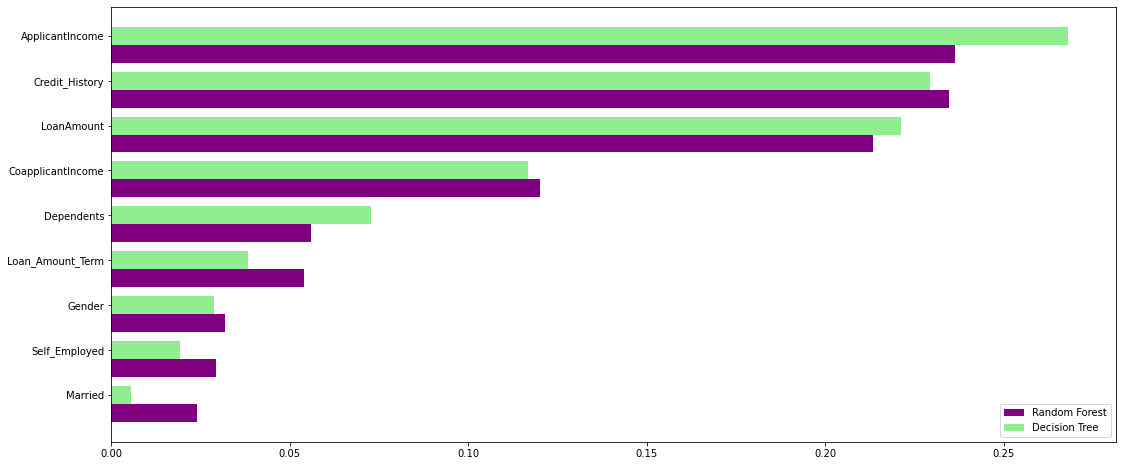

In [ ]:
feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dt':dt.feature_importances_
},index=df_dt.drop(columns=['Loan_ID','Loan_Status','Education','Property_Area']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test,rfc_pred_test)))

Model accuracy score: 0.7642


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,rfc_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123

